Jacobian is Matrix in robotics which provides the relation between joint velocities ($\dot{q}$)  & end-effector velocities ($\dot{X}$) of a robot manipulator.

as known as : *relationship between joint space and end-effector cartesian*

ref:https://www.rosroboticslearning.com/jacobian

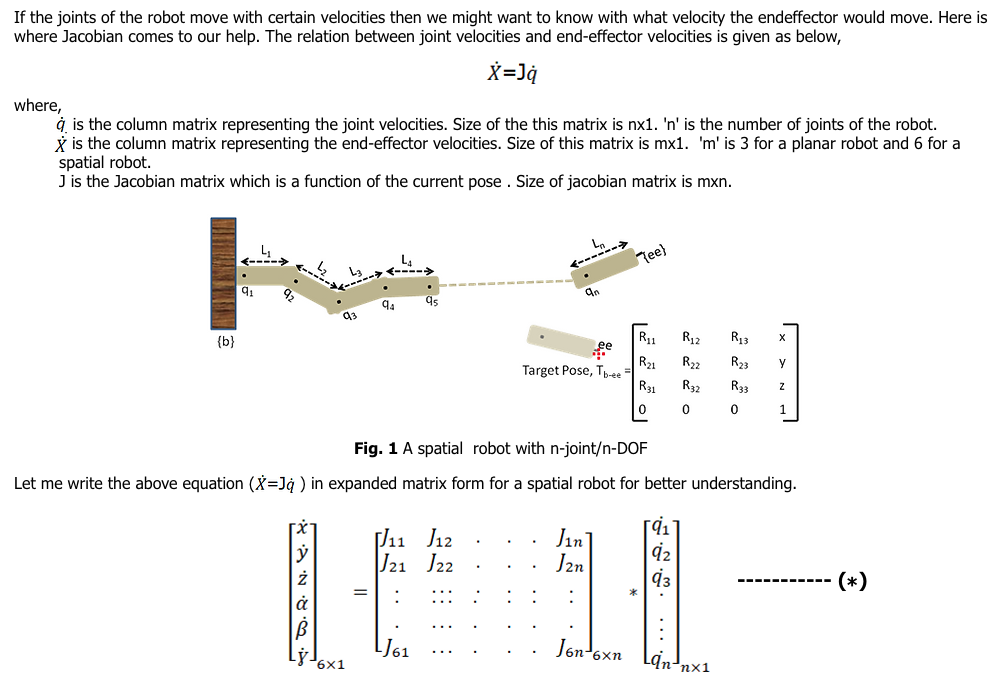

[Columns] of the Jacobian matrix are associated with joints of the robot. Each column in the Jacobian matrix represents the effect on end-effector velocities due to variation in each joint velocity.

[Rows] of the Jacobian matrix can also be split into two part. The first three rows are associated with linear velocities of end-effector and the last three rows are associated with the angular velocities of end-effector due to change in velocities of all the joints combined.

In [2]:
import numpy as np
from sympy import *
init_printing("mathjax") # sympy expression printing
from sympy import sin, cos, Matrix, symbols,Function
from sympy.physics.vector import dynamicsymbols
from sympy.abc import rho, phi

## RRR Planar manipulator

#### Declare variable

In [3]:
t = symbols('t')
q0,q1,q2 = dynamicsymbols('q_0,q_1,q_2')
L0,L1,L2 = symbols('L_0,L_1,L_2')


# Translation matrix convert frame 3(ee) to frame 2
T32 = Matrix([[cos(q2) , -sin(q2),     0,   L2*cos(q2)],
                 [ sin(q2),  cos(q2),     0,    L2*sin(q2)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 2 to frame 1
T21 = Matrix([[cos(q1) , -sin(q1),     0,    L1*cos(q1)],
                 [ sin(q1),  cos(q1),     0,    L1*sin(q1)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 1 to frame 0
T10 = Matrix([[ cos(q0), -sin(q0),     0,    L0*cos(q0)],
                 [ sin(q0),  cos(q0),     0,    L0*sin(q0)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
init_printing()

In [4]:
q = Matrix([q0,q1,q2])
q

⎡q₀(t)⎤
⎢     ⎥
⎢q₁(t)⎥
⎢     ⎥
⎣q₂(t)⎦

In [5]:
q_dot = diff(q)
q_dot

⎡d        ⎤
⎢──(q₀(t))⎥
⎢dt       ⎥
⎢         ⎥
⎢d        ⎥
⎢──(q₁(t))⎥
⎢dt       ⎥
⎢         ⎥
⎢d        ⎥
⎢──(q₂(t))⎥
⎣dt       ⎦

### Jacobian Method

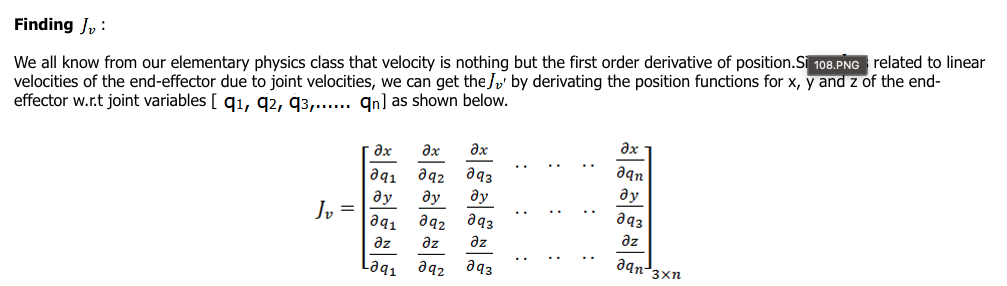

In [6]:
ee = Matrix([L2*cos(q2),L2*sin(q2),0,1])
ee

⎡L₂⋅cos(q₂(t))⎤
⎢             ⎥
⎢L₂⋅sin(q₂(t))⎥
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎣      1      ⎦

Forward Kinematic

In [7]:
Pee = T10@T21@ee
Pee

⎡L₀⋅cos(q₀(t)) - L₁⋅sin(q₀(t))⋅sin(q₁(t)) + L₁⋅cos(q₀(t))⋅cos(q₁(t)) + L₂⋅(-si
⎢                                                                             
⎢L₀⋅sin(q₀(t)) + L₁⋅sin(q₀(t))⋅cos(q₁(t)) + L₁⋅sin(q₁(t))⋅cos(q₀(t)) + L₂⋅(-si
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

n(q₀(t))⋅sin(q₁(t)) + cos(q₀(t))⋅cos(q₁(t)))⋅cos(q₂(t)) + L₂⋅(-sin(q₀(t))⋅cos(
                                                                              
n(q₀(t))⋅sin(q₁(t)) + cos(q₀(t))⋅cos(q₁(t)))⋅sin(q₂(t)) + L₂⋅(sin(q₀(t))⋅cos(q
                                                                              
                     0                                                        
                                                   

In [8]:
Jv = Pee.jacobian(q)
Jv

⎡-L₀⋅sin(q₀(t)) - L₁⋅sin(q₀(t))⋅cos(q₁(t)) - L₁⋅sin(q₁(t))⋅cos(q₀(t)) + L₂⋅(si
⎢                                                                             
⎢L₀⋅cos(q₀(t)) - L₁⋅sin(q₀(t))⋅sin(q₁(t)) + L₁⋅cos(q₀(t))⋅cos(q₁(t)) + L₂⋅(-si
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

n(q₀(t))⋅sin(q₁(t)) - cos(q₀(t))⋅cos(q₁(t)))⋅sin(q₂(t)) + L₂⋅(-sin(q₀(t))⋅cos(
                                                                              
n(q₀(t))⋅sin(q₁(t)) + cos(q₀(t))⋅cos(q₁(t)))⋅cos(q₂(t)) + L₂⋅(-sin(q₀(t))⋅cos(
                                                                              
                     0                                                        
                                                   

In [9]:
Vee = Jv@q_dot
simplify(Vee)

⎡                                d                                            
⎢- L₂⋅sin(q₀(t) + q₁(t) + q₂(t))⋅──(q₂(t)) - (L₁⋅sin(q₀(t) + q₁(t)) + L₂⋅sin(q
⎢                                dt                                           
⎢                                                                             
⎢                               d                                             
⎢ L₂⋅cos(q₀(t) + q₁(t) + q₂(t))⋅──(q₂(t)) + (L₁⋅cos(q₀(t) + q₁(t)) + L₂⋅cos(q₀
⎢                               dt                                            
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                       d                                                      
₀(t) + q₁(t) + q₂(t)))⋅──(q₁(t)) - (L₀⋅sin(q₀(t)) +

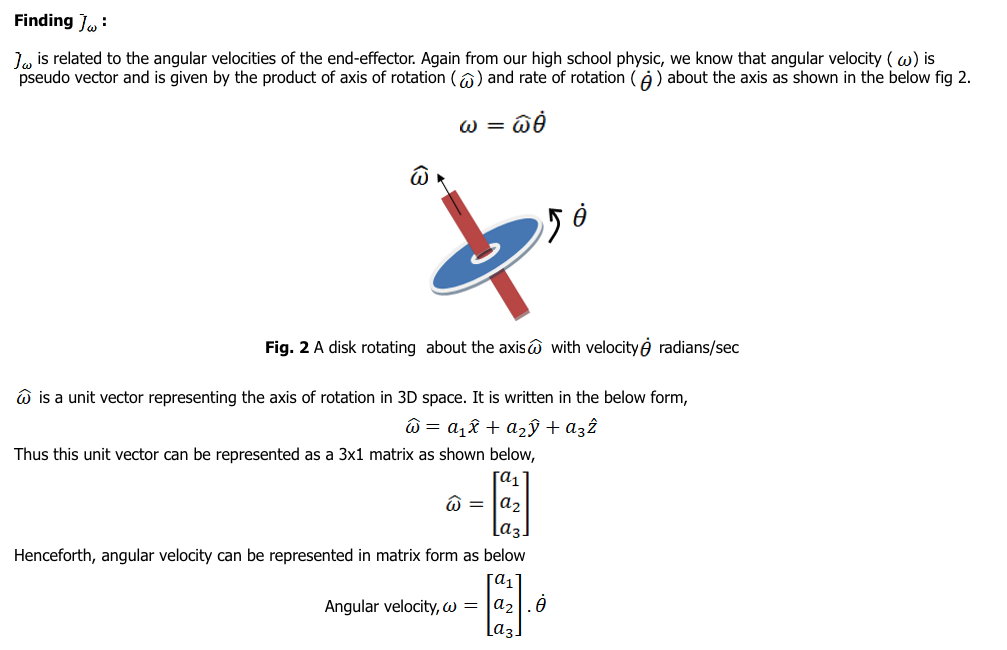
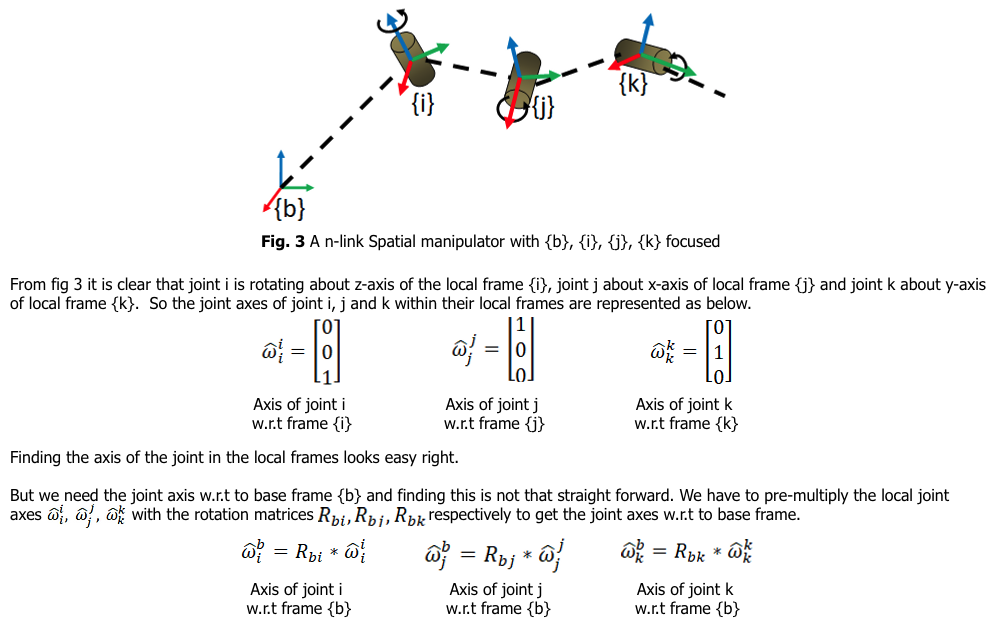
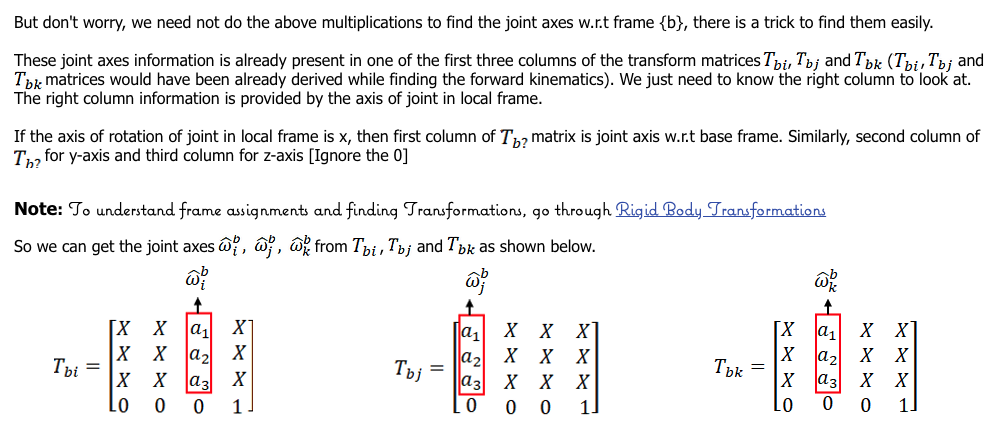

### Derivative Method

In [10]:
Vee = diff(Pee,t)

In [11]:
simplify(Vee)


⎡                d                                 d                          
⎢- L₀⋅sin(q₀(t))⋅──(q₀(t)) - L₁⋅sin(q₀(t) + q₁(t))⋅──(q₀(t)) - L₁⋅sin(q₀(t) + 
⎢                dt                                dt                         
⎢                                                                             
⎢               d                                 d                           
⎢ L₀⋅cos(q₀(t))⋅──(q₀(t)) + L₁⋅cos(q₀(t) + q₁(t))⋅──(q₀(t)) + L₁⋅cos(q₀(t) + q
⎢               dt                                dt                          
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

       d                                         d                            
q₁(t))⋅──(q₁(t)) - L₂⋅sin(q₀(t) + q₁(t) + q₂(t))⋅──

## 6-DOF robot manipulator (Pose is easy)

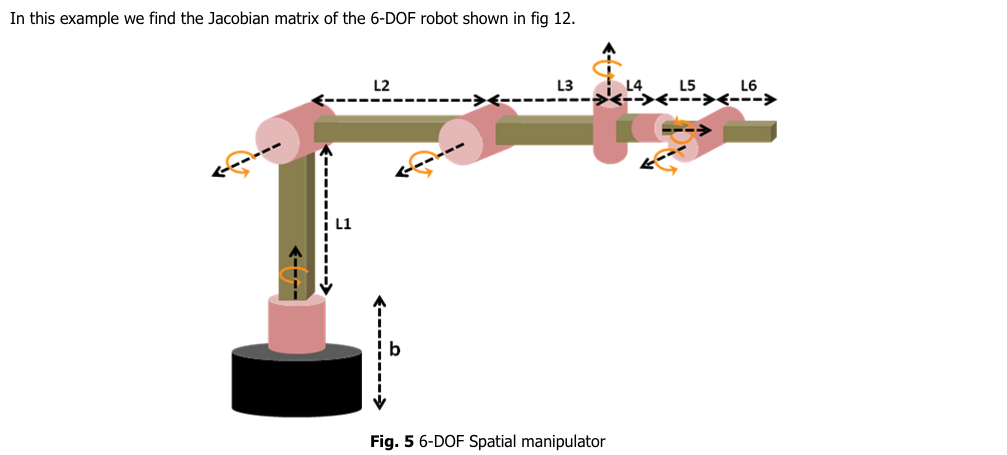
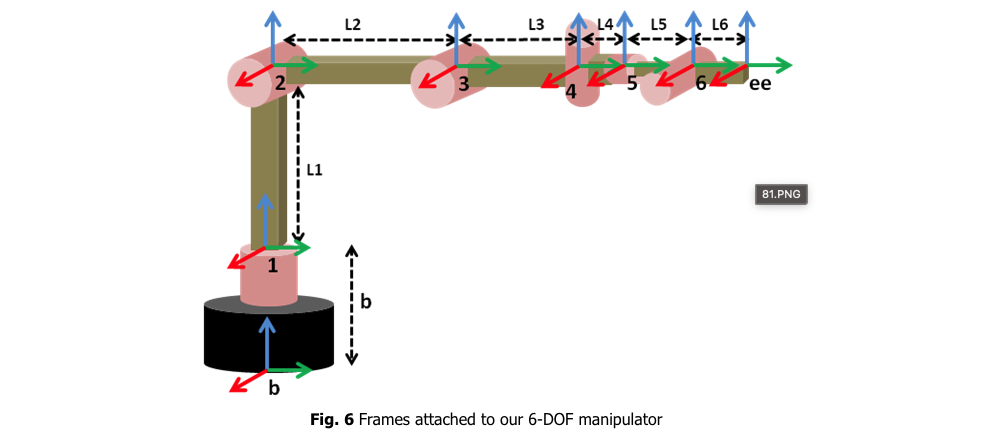

### Declare variable

In [12]:
t = symbols('t')
q1,q2,q3,q4,q5,q6 = dynamicsymbols('q_1,q_2,q_3,q_4,q_5,q_6')

q1_dot = dynamicsymbols('\dot{q}_1')
q2_dot = dynamicsymbols('\dot{q}_2')
q3_dot = dynamicsymbols('\dot{q}_3')
q4_dot = dynamicsymbols('\dot{q}_4')
q5_dot = dynamicsymbols('\dot{q}_5')
q6_dot = dynamicsymbols('\dot{q}_6')

b,L1,L2,L3,L4,L5,L6 = symbols('b,L_1,L_2,L_3,L_4,L_5,L_6')


In [13]:
q = Matrix([q1,q2,q3,q4,q5,q6])
q_dot = Matrix([q1_dot,q2_dot,q3_dot,q4_dot,q5_dot,q6_dot])

In [14]:
# Transformation matrix convert frame {ee} to frame {6}
T6_ee = Matrix([[       1,        0,     0,      0],
                [       0,        1,     0,     L6],
                [       0,        0,     1,      0],
                [       0,        0,     0,      1]])
# Transformation matrix convert frame {6} to frame {5}
T56 = Matrix([[       1,        0,           0,      0],
              [       0,  cos(q6),    -sin(q6),     L5],
              [       0,  sin(q6),     cos(q6),      0],
              [       0,        0,           0,      1]])
# Transformation matrix convert frame {5} to frame {4}
T45 = Matrix([[   cos(q5),        0,      sin(q5),      0],
              [         0,        1,            0,     L4],
              [  -sin(q6),        0,      cos(q5),      0],
              [         0,        0,            0,      1]])
# Transformation matrix convert frame {4} to frame {3}
T34 = Matrix([[   cos(q4),     -sin(q4),      0,      0],
              [   sin(q4),      cos(q4),      0,     L3],
              [         0,        0,          1,      0],
              [         0,        0,          0,      1]])
# Transformation matrix convert frame {3} to frame {2}
T23 = Matrix([[       1,        0,           0,      0],
              [       0,  cos(q3),    -sin(q3),     L2],
              [       0,  sin(q3),     cos(q3),      0],
              [       0,        0,           0,      1]])
# Transformation matrix convert frame {2} to frame {1}
T12 = Matrix([[       1,        0,           0,      0],
              [       0,  cos(q2),    -sin(q2),      0],
              [       0,  sin(q3),     cos(q3),     L1],
              [       0,        0,           0,      1]])
# Transformation matrix convert frame {1} to frame {b}
Tb1 = Matrix([[   cos(q1),     -sin(q1),      0,      0],
              [   sin(q1),      cos(q1),      0,      0],
              [         0,        0,          1,      b],
              [         0,        0,          0,      1]])

In [15]:
Tee_b = Tb1@T12@T23@T34@T45@T56@T6_ee
Tee_b.col(3)

⎡  -L₂⋅sin(q₁(t))⋅cos(q₂(t)) + L₃⋅(sin(q₁(t))⋅sin(q₂(t))⋅sin(q₃(t)) - sin(q₁(t
⎢                                                                             
⎢L₂⋅cos(q₁(t))⋅cos(q₂(t)) + L₃⋅(-sin(q₂(t))⋅sin(q₃(t))⋅cos(q₁(t)) + cos(q₁(t))
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

))⋅cos(q₂(t))⋅cos(q₃(t))) + L₄⋅((sin(q₁(t))⋅sin(q₂(t))⋅sin(q₃(t)) - sin(q₁(t))
                                                                              
⋅cos(q₂(t))⋅cos(q₃(t))) + L₄⋅((-sin(q₂(t))⋅sin(q₃(t))⋅cos(q₁(t)) + cos(q₁(t))⋅
                                                                              
                                                   

In [16]:
Jv = Tee_b.col(3).jacobian(q)
Jv = Matrix(np.matrix(Jv)[0:3,:])
shape(Jv)

In [17]:
# use row[0,2]
Omega_11 = Matrix([0,0,1,0])
Wb1 = Matrix(np.matrix(Tb1@Omega_11)[0:3,:])

Omega_22 = Matrix([1,0,0,0])
Tb2 = Tb1@T12
Wb2 = Matrix(np.matrix(Tb2@Omega_22)[0:3,:])

Omega_33 = Matrix([1,0,0,0])
Tb3 = Tb1@T12@T23
Wb3 = Matrix(np.matrix(Tb3@Omega_33)[0:3,:])

Omega_44 = Matrix([0,0,1,0])
Tb4 = Tb1@T12@T23@T34
Wb4 = Matrix(np.matrix(Tb4@Omega_44)[0:3,:])

Omega_55 = Matrix([0,1,0,0])
Tb5 = Tb1@T12@T23@T34@T45
Wb5 = Matrix(np.matrix(Tb5@Omega_55)[0:3,:])

Omega_66 = Matrix([0,1,0,0])
Tb6 = Tb1@T12@T23@T34@T45@T56
Wb6 = Matrix(np.matrix(Tb6@Omega_66)[0:3,:])


In [18]:
Jw = Wb1.col_insert(1,Wb2).col_insert(2,Wb3).col_insert(3,Wb4).col_insert(4,Wb5).col_insert(5,Wb6)
Jw

⎡0  cos(q₁(t))  cos(q₁(t))  sin(q₁(t))⋅sin(q₂(t))⋅cos(q₃(t)) + sin(q₁(t))⋅sin(
⎢                                                                             
⎢0  sin(q₁(t))  sin(q₁(t))  -sin(q₂(t))⋅cos(q₁(t))⋅cos(q₃(t)) - sin(q₃(t))⋅cos
⎢                                                                             
⎢                                                    2             2          
⎣1      0           0                           - sin (q₃(t)) + cos (q₃(t))   

q₃(t))⋅cos(q₂(t))   (sin(q₁(t))⋅sin(q₂(t))⋅sin(q₃(t)) - sin(q₁(t))⋅cos(q₂(t))⋅
                                                                              
(q₁(t))⋅cos(q₂(t))  (-sin(q₂(t))⋅sin(q₃(t))⋅cos(q₁(t)) + cos(q₁(t))⋅cos(q₂(t))
                                                                              
                                                                              
                                                       2⋅sin(q₃(t))⋅cos(q₃(t))

cos(q₃(t)))⋅cos(q₄(t)) - sin(q₄(t))⋅cos(q₁(t))    

### Answer:

In [19]:
Jv

⎡-L₂⋅cos(q₁(t))⋅cos(q₂(t)) + L₃⋅(sin(q₂(t))⋅sin(q₃(t))⋅cos(q₁(t)) - cos(q₁(t))
⎢                                                                             
⎢-L₂⋅sin(q₁(t))⋅cos(q₂(t)) + L₃⋅(sin(q₁(t))⋅sin(q₂(t))⋅sin(q₃(t)) - sin(q₁(t))
⎢                                                                             
⎢                                                                             
⎣                                                                             

⋅cos(q₂(t))⋅cos(q₃(t))) + L₄⋅((sin(q₂(t))⋅sin(q₃(t))⋅cos(q₁(t)) - cos(q₁(t))⋅c
                                                                              
⋅cos(q₂(t))⋅cos(q₃(t))) + L₄⋅((sin(q₁(t))⋅sin(q₂(t))⋅sin(q₃(t)) - sin(q₁(t))⋅c
                                                                              
                                                                              
                                                                              

os(q₂(t))⋅cos(q₃(t)))⋅cos(q₄(t)) + sin(q₁(t))⋅sin(

In [20]:
Jw

⎡0  cos(q₁(t))  cos(q₁(t))  sin(q₁(t))⋅sin(q₂(t))⋅cos(q₃(t)) + sin(q₁(t))⋅sin(
⎢                                                                             
⎢0  sin(q₁(t))  sin(q₁(t))  -sin(q₂(t))⋅cos(q₁(t))⋅cos(q₃(t)) - sin(q₃(t))⋅cos
⎢                                                                             
⎢                                                    2             2          
⎣1      0           0                           - sin (q₃(t)) + cos (q₃(t))   

q₃(t))⋅cos(q₂(t))   (sin(q₁(t))⋅sin(q₂(t))⋅sin(q₃(t)) - sin(q₁(t))⋅cos(q₂(t))⋅
                                                                              
(q₁(t))⋅cos(q₂(t))  (-sin(q₂(t))⋅sin(q₃(t))⋅cos(q₁(t)) + cos(q₁(t))⋅cos(q₂(t))
                                                                              
                                                                              
                                                       2⋅sin(q₃(t))⋅cos(q₃(t))

cos(q₃(t)))⋅cos(q₄(t)) - sin(q₄(t))⋅cos(q₁(t))    

In [21]:
J = Jv.row_insert(3,Jw)
J
# print(shape(J))

⎡-L₂⋅cos(q₁(t))⋅cos(q₂(t)) + L₃⋅(sin(q₂(t))⋅sin(q₃(t))⋅cos(q₁(t)) - cos(q₁(t))
⎢                                                                             
⎢-L₂⋅sin(q₁(t))⋅cos(q₂(t)) + L₃⋅(sin(q₁(t))⋅sin(q₂(t))⋅sin(q₃(t)) - sin(q₁(t))
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                   

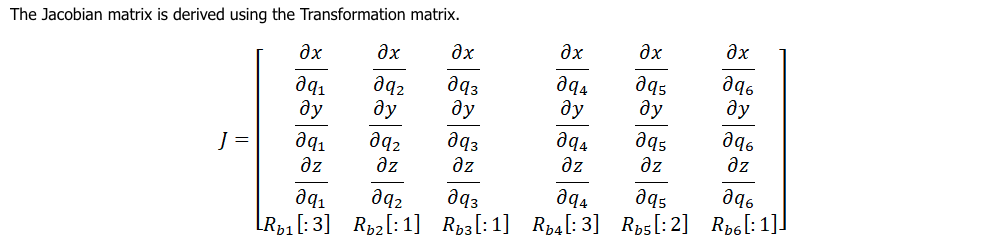

### Jacobian Inversion Method

Find Inverse Kinematic by using Jacobian

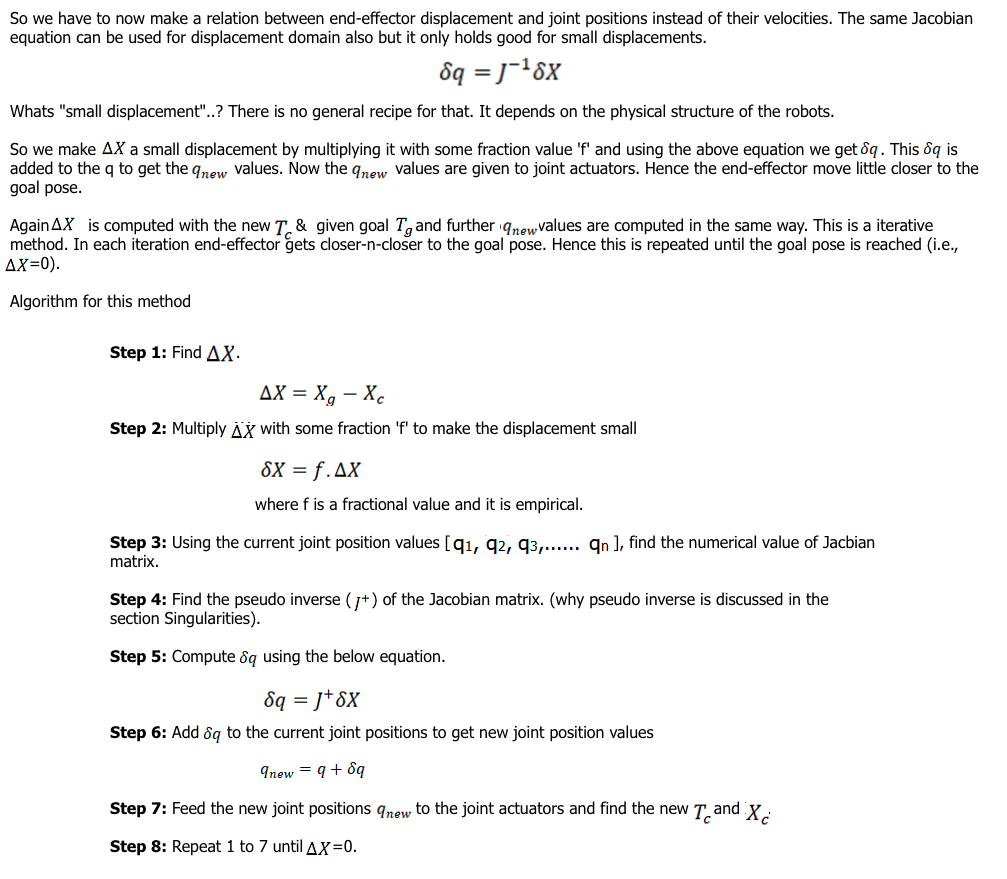

divide path to point for getting the small displacement

## HERO-H4

In [22]:
import numpy as np
import sympy as sp
from sympy import sin, cos, Matrix, symbols
from sympy.physics.vector import dynamicsymbols
from sympy.abc import rho, phi, alpha, theta

In [23]:
q0,q1,q2= dynamicsymbols('q_0,q_1,q_2')
q0_dot,q1_dot,q2_dot= dynamicsymbols('\dot{q}_0,\dot{q}_1,\dot{q}_2')
L0,L1,L2 = symbols('L_0,L_1,L_2')
q = Matrix([q1,q2])
q_dot = Matrix([q1_dot,q2_dot])


### Front Leg

In [24]:
# Translation matrix convert frame 3(ee) to frame 2
T23 = Matrix([[       1,        0,       0,       0],
              [       0,        1,       0,     -L2],
              [       0,        0,       1,       0],
              [       0,        0,       0,       1]])
# Translation matrix convert frame 2 to frame 1
T12 = Matrix([[cos(q2) , -sin(q2),     0,        L1],
              [ sin(q2),  cos(q2),     0,         0],
              [       0,        0,     1,         0],
              [       0,        0,     0,         1]])
# Translation matrix convert frame 1 to frame 0
T01 = Matrix([[ cos(q1), -sin(q1),     0,        L0],
              [ sin(q1),  cos(q1),     0,         0],
              [       0,        0,     1,         0],
              [       0,        0,     0,         1]])

T03 = (T01@T12@T23)[:-1,3]
# print(T03)

Jv = T03.jacobian(q)
Jv

⎡-L₁⋅sin(q₁(t)) - L₂⋅(sin(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t)))  -L₂⋅(sin
⎢                                                                             
⎢L₁⋅cos(q₁(t)) - L₂⋅(-sin(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t)))  -L₂⋅(-si
⎢                                                                             
⎣                                 0                                           

(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t))) ⎤
                                            ⎥
n(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t)))⎥
                                            ⎥
                 0                          ⎦

In [25]:
Xee_dot = Jv@q_dot
Xee_dot

⎡-L₂⋅(sin(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t)))⋅\dot{q}₂(t) + (-L₁⋅sin(q₁
⎢                                                                             
⎢-L₂⋅(-sin(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t)))⋅\dot{q}₂(t) + (L₁⋅cos(q₁
⎢                                                                             
⎣                                                                         0   

(t)) - L₂⋅(sin(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t))))⋅\dot{q}₁(t) ⎤
                                                                       ⎥
(t)) - L₂⋅(-sin(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t))))⋅\dot{q}₁(t)⎥
                                                                       ⎥
                                                                       ⎦

### Back Leg

In [26]:
# Translation matrix convert frame 3(ee) to frame 2
T23 = Matrix([[       1,        0,     0,              0],
                 [       0,        1,     0,             -L2],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 2 to frame 1
T12 = Matrix([[cos(q2) , -sin(q2),     0,            -L1],
                 [ sin(q2),  cos(q2),     0,            0],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 1 to frame 0
T01 = Matrix([[ cos(q1), -sin(q1),     0,            -L0],
                 [ sin(q1),  cos(q1),     0,             0],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])

T03 = (T01@T12@T23)[:-1,3]
# print(T03)

Jv = T03.jacobian(q)
Jv

⎡ L₁⋅sin(q₁(t)) - L₂⋅(sin(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t)))   -L₂⋅(si
⎢                                                                             
⎢-L₁⋅cos(q₁(t)) - L₂⋅(-sin(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t)))  -L₂⋅(-s
⎢                                                                             
⎣                                 0                                           

n(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t))) ⎤
                                             ⎥
in(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t)))⎥
                                             ⎥
                  0                          ⎦

In [27]:
Xee_dot = Jv@q_dot
Xee_dot

⎡ -L₂⋅(sin(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t)))⋅\dot{q}₂(t) + (L₁⋅sin(q₁
⎢                                                                             
⎢-L₂⋅(-sin(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t)))⋅\dot{q}₂(t) + (-L₁⋅cos(q
⎢                                                                             
⎣                                                                          0  

(t)) - L₂⋅(sin(q₁(t))⋅sin(q₂(t)) - cos(q₁(t))⋅cos(q₂(t))))⋅\dot{q}₁(t)  ⎤
                                                                        ⎥
₁(t)) - L₂⋅(-sin(q₁(t))⋅cos(q₂(t)) - sin(q₂(t))⋅cos(q₁(t))))⋅\dot{q}₁(t)⎥
                                                                        ⎥
                                                                        ⎦

In [31]:
V1 = [1,1]
V2 = [2,3]

Vr = np.sum([V1,V2],axis=0)
Vr

array([3, 4])